# Планирование рекламных кампаний в игровой индустрии для интернет-магазина "Стримчик"

Мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Примечание:**

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Изучение данных из файлов

Импортируем необходимые библиотеки:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import math
import numpy as np
pd.set_option('display.float_format', '{:,.2f}'.format) 

Сохраним датасет в переменную `data`.

In [3]:
data = pd.read_csv('/datasets/games.csv')

Посмотрим первые 10 строк.

In [4]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,nan,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,nan,NaN,NaN
5,Tetris,GB,"1,989.00",Puzzle,23.20,2.26,4.22,0.58,nan,NaN,NaN
6,New Super Mario Bros.,DS,"2,006.00",Platform,11.28,9.14,6.50,2.88,89.00,8.5,E
7,Wii Play,Wii,"2,006.00",Misc,13.96,9.18,2.93,2.84,58.00,6.6,E
8,New Super Mario Bros. Wii,Wii,"2,009.00",Platform,14.44,6.94,4.70,2.24,87.00,8.4,E
9,Duck Hunt,NES,"1,984.00",Shooter,26.93,0.63,0.28,0.47,nan,NaN,NaN


Посмотрим общую информацию о данных.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Видно, что в некоторых столбцах есть пропущенные значения.

Согласно документации, столбцы означают следующее:
- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Проведем еще одно описание данных в датасете.

In [6]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,"16,446.00","16,715.00","16,715.00","16,715.00","16,715.00","8,137.00"
mean,"2,006.48",0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,"1,980.00",0.00,0.00,0.00,0.00,13.00
25%,"2,003.00",0.00,0.00,0.00,0.00,60.00
50%,"2,007.00",0.08,0.02,0.00,0.01,71.00
75%,"2,010.00",0.24,0.11,0.04,0.03,79.00
max,"2,016.00",41.36,28.96,10.22,10.57,98.00


Видно, что для некоторых игр количество проданных копий составляет 0. Либо данных по этим играм нет, либо эти игры совсем никому были не нужны...

**Вывод:**

- Были изучены данные, представленные в датасете. 
- В столбцах есть нарушения стиля написания, отсутствующие значения и "выбросы".

## Подготовка данных

### Замена названий столбцов

Приведем названия столбцов к нижнему регистру. 

Выведем новый датасет на экран.

In [7]:
data = data.rename(str.lower, axis='columns')
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,nan,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,nan,NaN,NaN
5,Tetris,GB,"1,989.00",Puzzle,23.20,2.26,4.22,0.58,nan,NaN,NaN
6,New Super Mario Bros.,DS,"2,006.00",Platform,11.28,9.14,6.50,2.88,89.00,8.5,E
7,Wii Play,Wii,"2,006.00",Misc,13.96,9.18,2.93,2.84,58.00,6.6,E
8,New Super Mario Bros. Wii,Wii,"2,009.00",Platform,14.44,6.94,4.70,2.24,87.00,8.4,E
9,Duck Hunt,NES,"1,984.00",Shooter,26.93,0.63,0.28,0.47,nan,NaN,NaN


### Преобразование типов данных

Посмотрим еще раз на типы данных в столбцах.

In [8]:
data.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

Можно заменить:
- Тип данных в столбце `year_of_release` на `int`.
- Тип данных в столбце `user_score` и `rating` на `float`.

Заменим тип данных в столбце `year_of_release`, сначала изменив все отсутсвующие значения на 0.

In [9]:
data['year_of_release'] = data['year_of_release'].fillna(0).astype('int')

В столбце `user_score` заменим значение `tbd` или `To Be Determined`, которое означает, что рейтинг по этим играм еще не был определен, на 0.

In [10]:
data['user_score'].replace('tbd',0,inplace=True)

Теперь можно заменить типы данных в столбцах с рейтингом.

In [11]:
columns_to_replace = ['critic_score', 'user_score']
for column in columns_to_replace:
    data[column] = data[column].fillna(0).astype('float')

Проверим еще раз типы данных в столбцах.

In [12]:
data.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

### Обработка пропусков

Сначала посчитаем количество пропусков в каждом столбце.

In [13]:
data.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6766
dtype: int64

Теперь посмотрим на пропуски в столбцах, в которых они присутствуют.


#### `name` и `genre`

In [14]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,0.00,0.00,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,0.00,0.00,NaN


Видно, что в данном случае есть какая-то игра, для которой не известно и название, и жанр.
Можно заменить эти значения на `unknown`.

In [15]:
data['name'].fillna('unknown',inplace=True)
data['genre'].fillna('unknown',inplace=True)

#### `rating`

Сначала посмотрим список уникальных значений столбца.

In [16]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Согласно [Википедии](https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board), рейтинг `K-A` или `Kids to Adults` в настоящее время был замен на `E` или `Everyone`. Также в датасете есть игры в рейтингом `E-C` или `Early Childhood`, который также можно заменить на `E`.

In [17]:
data.replace(['K-A', 'EC'], 'E', inplace=True)

Теперь посмотрим на игры без рейтинга.

In [18]:
data[data['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.00,0.00,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.00,0.00,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,0.00,0.00,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,0.00,0.00,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,0.00,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.00,0.00,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.00,0.00,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.00,0.00,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.00,0.00,NaN


Видно, что для большого числа строк в датасете рейтинг неопределен.

Согласно той же [Википедии](https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board), рейтинг начал свою работу в 1994 году. Проверим, сколько игр новее 1994 года в датасете без рейтинга.

In [19]:
data[(data['rating'].isna()) & (data['year_of_release'] > 1994)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.00,0.00,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,0.00,0.00,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,0.00,0.00,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,0.00,0.00,NaN
25,Pokemon Ruby/Pokemon Sapphire,GBA,2002,Role-Playing,6.06,3.90,5.38,0.50,0.00,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.00,0.00,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.00,0.00,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.00,0.00,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.00,0.00,NaN


Видно, что таких строк в датасете все еще много.

Найти все рейтинги в данном случае будет достаточно проблематично, поэтому пока предлагается заменить пропуски в столбце на `unknown`.

In [20]:
data['rating'].fillna('unknown',inplace=True)

**Вывод:**

В данном пункте была проведена подготовка данных:
- Названия столбцов приведены к нижнему регистру.
- Заменены типы данных в столбцах `year_of_release`, `critic_score` и `user_score`.
- Были обнаружены устаревшие рейтинги в столбце `rating`, которые были заменены на их новые аналоги.
- Было обнаружено большое количество отсутствующих значений рейтингов, которые были заменены на значение `unknown`.

## Исследовательский анализ данных

### Количество выпускаемых игр

Посмотрим, сколько выпускалось игр в разные года.

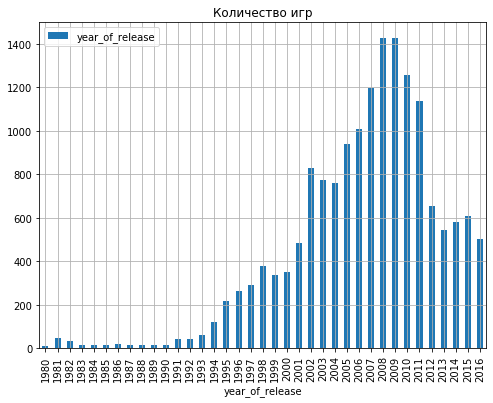

In [21]:
(data.
 query('year_of_release > 0').
 pivot_table(index='year_of_release', 
             aggfunc={'year_of_release':'count'}).
 plot(kind='bar',
      title='Количество игр',
      grid=True,
      figsize=(8,6))
)

**Вывод:**

Видно, что до 1990 года выпускалось достаточно мало игр.

### Продажи по платформам

Посмотрим список уникальных платформ.

In [22]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Посчитаем суммарные продажи для каждой платформы.

Для удобства сначала добавим столбец с общими продажами для каждой строки.

In [23]:
data['sales'] = data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']

In [24]:
(data.
 pivot_table(index='platform',
             values='sales',
             aggfunc='sum').
 sort_values(by='sales',ascending=False)
)

,sales
platform,
PS2,"1,255.77"
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


Сохраним первые 6 строк предыдущей таблицы в отдельную переменную.

In [25]:
top6 = (data.
 pivot_table(index='platform',
             values='sales',
             aggfunc='sum').
 sort_values(by='sales',ascending=False)
)[:6]

Создадим функцию для построения графика.

In [56]:
def platform_plot(x):
    (data.
     query('platform == @x & year_of_release > 0').
     pivot_table(index='year_of_release',
                 values='sales',
                 aggfunc='sum').
     plot(kind='bar',
          title=x,
          grid=True)
    )

Посмотрим распределение по годам для платформ с самыми большими продажами.

#### PS2

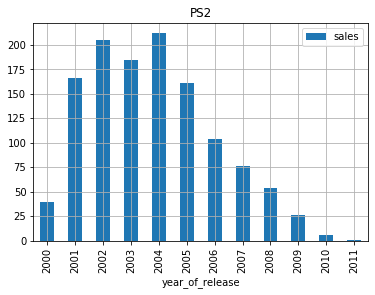

In [58]:
platform_plot(top6.index[0])

#### X360

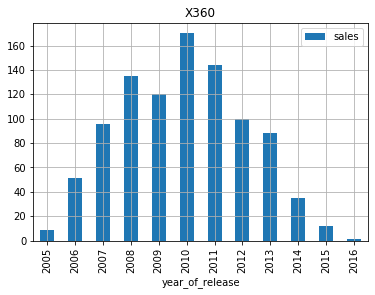

In [59]:
platform_plot(top6.index[1])

#### PS3

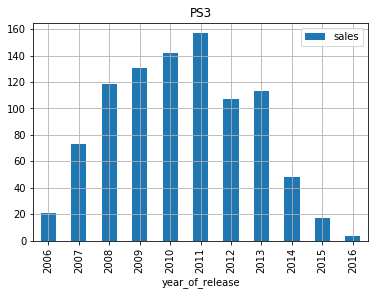

In [60]:
platform_plot(top6.index[2])

#### Wii

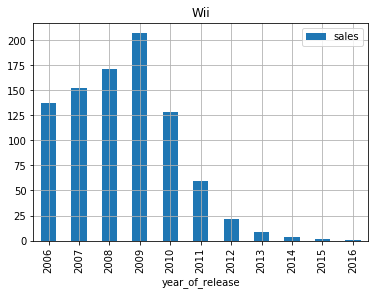

In [63]:
platform_plot(top6.index[3])

#### DS

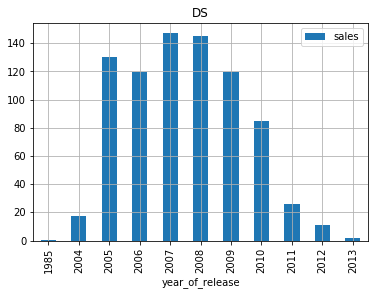

In [64]:
platform_plot(top6.index[4])

#### PS

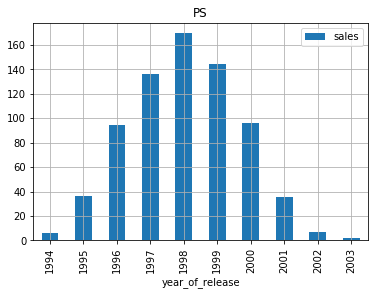

In [65]:
platform_plot(top6.index[5])

**Вывод:**

Видно, что в среднем платформы живут около 7-8 лет.

### Продажи по платформам в актуальном периоде

Наша задача - работа с актуальными платформами. 

Возьмем в качестве начала актуального периода дату начала продаж последних платформ PS4 и Xbox One. Они вышли в конце 2013 года, поэтому в качестве начала актуального периода можно выбрать 2013 год.

Посчитаем продажи по платформам в актуальном периоде.

In [30]:
(data.
 query('year_of_release > 2012').
 pivot_table(index='platform',
             values='sales',
             aggfunc='sum').
 sort_values(by='sales',
             ascending=False)
)

,sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


Построим график с общими продажами на каждых платформах в 2013-2016 годах.

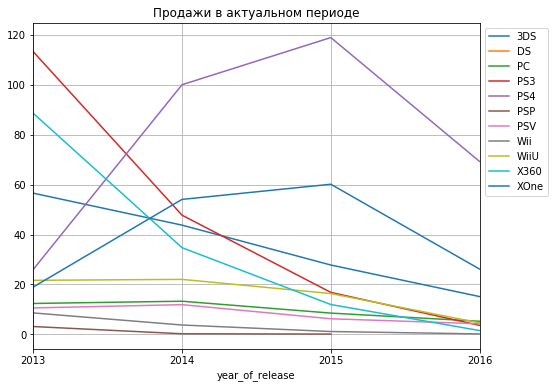

In [31]:
(data.
 query('year_of_release > 2012').
 pivot_table(index='year_of_release',
             columns='platform',
             values='sales',
             aggfunc='sum').
 plot(kind='line',
      xticks=np.arange(2013,2017,1),
      title='Продажи в актуальном периоде',
      grid=True,
      figsize=(8,6)).
 legend(bbox_to_anchor=(1,1))
)

На графике видно, что:
- Продажи игр на PS3 и X360 начали сильно падать после появления их преемников в 2013 году.
- В качестве потенциально прибыльных платформ лучше выбрать только PS4 и XOne, так как они обладают наибольшими общими продажами на последний год, представленный в датасете - 2016.

In [61]:
# КОД РЕВЬЮЕРА

data.query("year_of_release > 2012").pivot_table(index='year_of_release', columns='platform', values='sales', aggfunc='sum').loc[[2015, 2016]]

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2015,27.78,nan,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,nan,5.25,3.60,69.25,nan,4.25,0.18,4.60,1.52,26.15


#### Ящик с усами для потенциально прибыльных платформ

Построим "ящик с усами" для платформ PS4, XOne, 3DS и PC.

Сначала создадим переменную с именами этих платформ.

In [ ]:
top4 = ['PS4', 'XOne', '3DS', 'PC']

Сохраним продажи каждой платформы в отдельный файл.

In [73]:
ps4_sales = data.query('platform == "PS4" & year_of_release > 0')['sales']
xone_sales = data.query('platform == "XOne" & year_of_release > 0')['sales']
ds3_sales = data.query('platform == "3DS" & year_of_release > 0')['sales']
pc_sales = data.query('platform == "PC" & year_of_release > 0')['sales']

Построим график "ящик с усами" (сначала не учитывая выбросы).

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


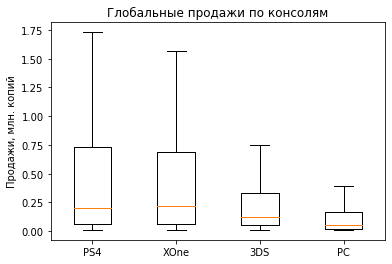

In [94]:
plt.boxplot([ps4_sales, xone_sales, ds3_sales, pc_sales],
            labels=top4,
            showfliers=False)
plt.ylabel('Продажи, млн. копий')
plt.title('Глобальные продажи по консолям')
plt.show()

Теперь еще раз построим этот график, но уже учитывая выбросы.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


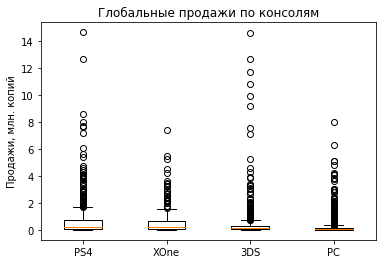

In [96]:
plt.boxplot([ps4_sales, xone_sales, ds3_sales, pc_sales],
            labels=top4,
            showfliers=True)
plt.ylabel('Продажи, млн. копий')
plt.title('Глобальные продажи по консолям')
plt.show()

**Вывод:**

Видно, что:
- Хоть продажи на PS4 выше, чем у Xbox One, медианное значение продаж для Xbox One все же больше.
- При этом продажи на 3DS и PC заметно ниже, чем на первых двух консолях.
- График с "выбросами" показал, что на PS4 и 3DS некоторые игры разошлись в 14 млн. копий. Для Xbox One и PC данные значения почти в 2 раза ниже. 

### Влияние оценок на продажи

#### PS4

**Оценки критиков:**

Посчитаем средние значения продаж для различных оценок критиков и построим график.

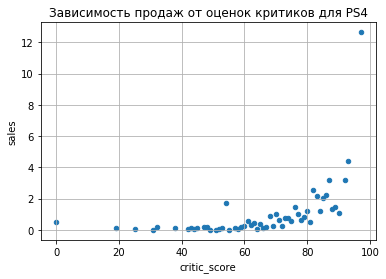

In [33]:
(data.
 query('year_of_release > 2012 & platform == "PS4"').
 pivot_table(index='critic_score',
             values='sales',
             aggfunc='mean').
 reset_index().
 plot(x='critic_score',
      y='sales',
      kind='scatter',
      title='Зависимость продаж от оценок критиков для PS4',
      grid=True)
)

Видно, что в среднем при увеличении оценок критиков растут и продажи. 

Посчитаем коэффициент корреляции.

In [34]:
(data.
 query('year_of_release > 2012 & platform == "PS4"').
 pivot_table(index='critic_score',
             values='sales',
             aggfunc='mean').
 reset_index().
 corr().
 iloc[1,0]
)

0.5127647210603958

Коэффицент корреляции составляет 0.513. Согласно [интернет-источникам](http://www.mathprofi.ru/linejnyj_koefficient_korrelyacii.html), это говорит о заметной корреляции.

**Оценки пользователей:**

Посчитаем то же самое для оценок пользователей.

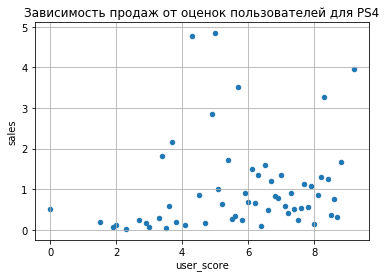

In [35]:
(data.
 query('year_of_release > 2012 & platform == "PS4"').
 pivot_table(index='user_score',
             values='sales',
             aggfunc='mean').
 reset_index().
 plot(x='user_score',
      y='sales',
      kind='scatter',
      title='Зависимость продаж от оценок пользователей для PS4',
      grid=True)
)

Видно, что в данном случае не наблюдается похожей картины, как с оценками критиков.

Посчитаем коэффициент корреляции.

In [36]:
(data.
 query('year_of_release > 2012 & platform == "PS4"').
 pivot_table(index='user_score',
             values='sales',
             aggfunc='mean').
 reset_index().
 corr().
 iloc[1,0]
)

0.1860915134257461

Коэффицент корреляции составляет 0.186, что [говорит](http://www.mathprofi.ru/linejnyj_koefficient_korrelyacii.html) о слабой корреляции.

#### XOne

**Оценки критиков:**

Посчитаем то же самое для платформы XOne.

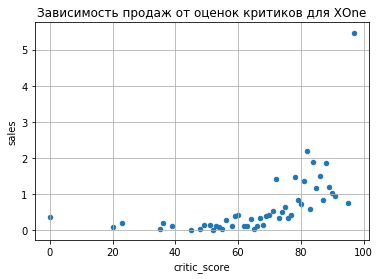

In [37]:
(data.
 query('year_of_release > 2012 & platform == "XOne"').
 pivot_table(index='critic_score',
             values='sales',
             aggfunc='mean').
 reset_index().
 plot(x='critic_score',
      y='sales',
      kind='scatter',
      title='Зависимость продаж от оценок критиков для XOne',
      grid=True)
)

Видно, что в среднем при увеличении оценок критиков продажи также растут. 

Посчитаем коэффициент корреляции.

In [38]:
(data.
 query('year_of_release > 2012 & platform == "XOne"').
 pivot_table(index='critic_score',
             values='sales',
             aggfunc='mean').
 reset_index().
 corr().
 iloc[1,0]
)

0.5580573663243653

Коэффицент корреляции составляет 0.558. Это [говорит](http://www.mathprofi.ru/linejnyj_koefficient_korrelyacii.html) о заметной корреляции.

**Оценки пользователей:**

Посчитаем то же самое для оценок пользователей.

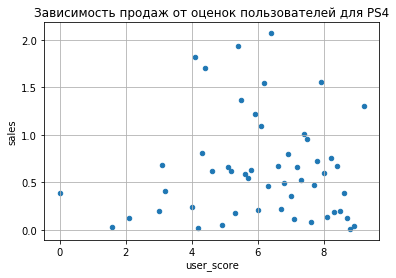

In [39]:
(data.
 query('year_of_release > 2012 & platform == "XOne"').
 pivot_table(index='user_score',
             values='sales',
             aggfunc='mean').
 reset_index().
 plot(x='user_score',
      y='sales',
      kind='scatter',
      title='Зависимость продаж от оценок пользователей для PS4',
      grid=True)
)

Видно, что в данном случае также не наблюдается похожей картины, как с оценками критиков.

Посчитаем коэффициент корреляции.

In [40]:
(data.
 query('year_of_release > 2012 & platform == "XOne"').
 pivot_table(index='user_score',
             values='sales',
             aggfunc='mean').
 reset_index().
 corr().
 iloc[1,0]
)

0.008380325025308184

Коэффицент корреляции составляет 0.008, что [говорит](http://www.mathprofi.ru/linejnyj_koefficient_korrelyacii.html) о еще более слабой корреляции.

**Вывод:**

Для обоих платформ продажи игр "заметно" коррелируют с оценками критиков на данные игры (коэффициенты корреляции 0.513 для PS4 и 0.558 для Xbox One).

При этом продажи игр никак не коррелируют с оценками пользователей (коэффициенты корреляции 0.186 для PS4 и 0.008 для Xbox One).

### Продажи по жанрам

Создадим сводную таблицу с продажами по жанрам и построим график.

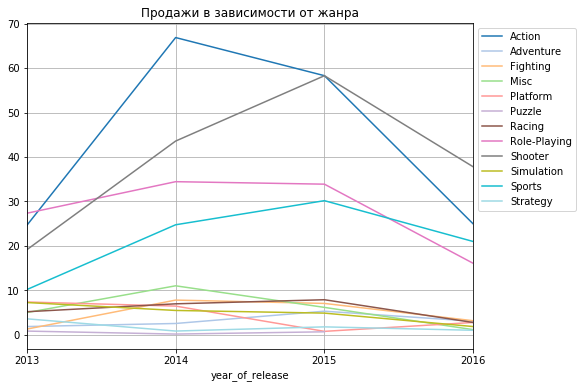

In [105]:
(data.
 query("year_of_release > 2012 & platform in @top4").
 pivot_table(index='year_of_release',
             columns='genre',
             values='sales',
             aggfunc='sum').
 plot(kind='line',
      xticks=np.arange(2013,2017,1),
      title='Продажи в зависимости от жанра',
      grid=True,
      figsize=(8,6),
      colormap='tab20').
 legend(bbox_to_anchor=(1, 1))
)

Построим так же график по средним продажам игр на данных платформах.

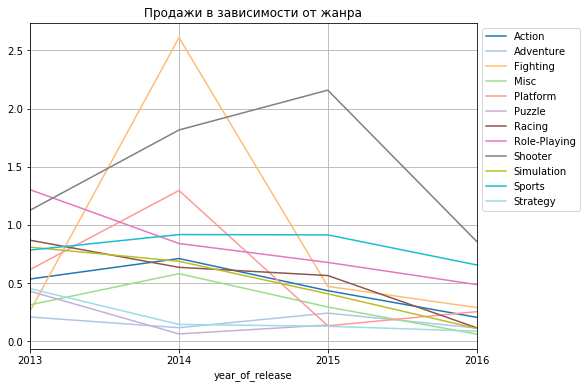

In [104]:
(data.
 query("year_of_release > 2012 & platform in @top4").
 pivot_table(index='year_of_release',
             columns='genre',
             values='sales',
             aggfunc='mean').
 plot(kind='line',
      xticks=np.arange(2013,2017,1),
      title='Продажи в зависимости от жанра',
      grid=True,
      figsize=(8,6),
      colormap='tab20').
 legend(bbox_to_anchor=(1, 1))
)

Построим график по медианным продажам.

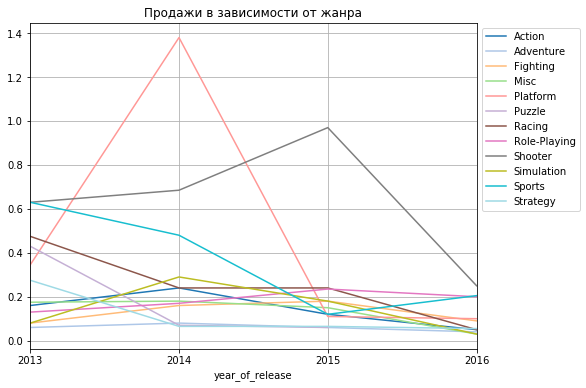

In [106]:
(data.
 query("year_of_release > 2012 & platform in @top4").
 pivot_table(index='year_of_release',
             columns='genre',
             values='sales',
             aggfunc='median').
 plot(kind='line',
      xticks=np.arange(2013,2017,1),
      title='Продажи в зависимости от жанра',
      grid=True,
      figsize=(8,6),
      colormap='tab20').
 legend(bbox_to_anchor=(1, 1))
)

**Вывод:**
- Больше всего продаж дают жанры Action, Shooter, Sports и Role-Playing.
- Если считать среднее значение продаж, то лидируют жанры Shooter, Sports и Role-Playing.
- Если считать медианное значение продаж, то лидируют жанры Shooter, Role-Playing и Sports.

### Портреты пользователей каждого региона в актуальном периоде

#### North America

Для того, чтобы определить самые популярные платформы, жанры и рейтинги игр у пользователей каждого региона, создадим соответствующие сводные таблицы.

**Самые популярные платформы:**

In [42]:
(data.
 query("year_of_release > 2012").
 pivot_table(index='platform',
             values='na_sales',
             aggfunc='sum').
 sort_values(by='na_sales',
             ascending=False).
 head()
)

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20


**Самые популярные жанры:**

In [43]:
(data.
 query("year_of_release > 2012").
 pivot_table(index='genre',
             values='na_sales',
             aggfunc='sum').
 sort_values(by='na_sales',
             ascending=False).
 head()
)

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49


**Продажи и рейтинг ESRB:**

In [44]:
(data.
 query("year_of_release > 2012").
 pivot_table(index='rating',
             values='na_sales',
             aggfunc='sum').
 sort_values(by='na_sales',
             ascending=False).
 head()
)

,na_sales
rating,
M,165.21
unknown,89.42
E,79.05
E10+,54.24
T,49.79


**Вывод:**

Типичный пользователь из Северной Америки играет:
- На платформе PS4, Xbox One или Xbox 360.
- В игры жанра Action, Shooter или Sports.
- В игры с рейтингом ESRB 'M' - 'Mature', то есть для людей от 17 лет или 'E' - 'Everyone', то есть для всех.

#### Europe

Повторим предыдущие вычисления для данного региона.

**Самые популярные платформы:**

In [45]:
(data.
 query("year_of_release > 2012").
 pivot_table(index='platform',
             values='eu_sales',
             aggfunc='sum').
 sort_values(by='eu_sales',
             ascending=False).
 head()
)

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96


**Самые популярные жанры:**

In [46]:
(data.
 query("year_of_release > 2012").
 pivot_table(index='genre',
             values='eu_sales',
             aggfunc='sum').
 sort_values(by='eu_sales',
             ascending=False).
 head()
)

,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19


**Продажи и рейтинг ESRB:**

In [47]:
(data.
 query("year_of_release > 2012").
 pivot_table(index='rating',
             values='eu_sales',
             aggfunc='sum').
 sort_values(by='eu_sales',
             ascending=False).
 head()
)

,eu_sales
rating,
M,145.32
E,83.36
unknown,78.91
E10+,42.69
T,41.95


**Вывод:**

Типичный пользователь из Европы играет:
- На платформе PS4, PS3 или Xbox One.
- В игры жанра Action, Shooter или Sports.
- В игры с рейтингом ESRB 'M' - 'Mature', то есть для людей от 17 лет или 'E' - 'Everyone', то есть для всех.

#### Japan

Повторим вычисления для данного региона.

**Самые популярные платформы:**

In [48]:
(data.
 query("year_of_release > 2012").
 pivot_table(index='platform',
             values='jp_sales',
             aggfunc='sum').
 sort_values(by='jp_sales',
             ascending=False).
 head()
)

,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88


**Самые популярные жанры:**

In [49]:
(data.
 query("year_of_release > 2012").
 pivot_table(index='genre',
             values='jp_sales',
             aggfunc='sum').
 sort_values(by='jp_sales',
             ascending=False).
 head()
)

,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61


**Продажи и рейтинг ESRB:**

In [50]:
(data.
 query("year_of_release > 2012").
 pivot_table(index='rating',
             values='jp_sales',
             aggfunc='sum').
 sort_values(by='jp_sales',
             ascending=False).
 head()
)

,jp_sales
rating,
unknown,85.05
T,20.59
E,15.14
M,14.11
E10+,5.89


**Вывод:**

Типичный пользователь из Японии играет:
- На платформе 3DS, PS3 или PS Vita.
- В игры жанра Role-Playing или Action.
- В игры с рейтингом ESRB 'T' - 'Teen', то есть для людей от 13 лет или 'E' - 'Everyone', то есть для всех.

## Проверка гипотиз

### Равенство пользовательских рейтингов платформ XOne и PC

Проверим гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Сначала построим гистограммы распределений этих оценок.

**Гистограмма оценок для Xbox One:**

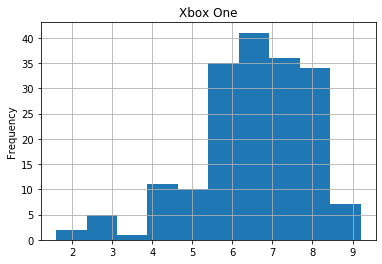

In [107]:
(data.
 query('platform == "XOne" & user_score > 0 & year_of_release > 2012')['user_score'].
 plot(kind='hist',
      title='Xbox One',
      grid=True)
)

**Гистограмма оценок для PC:**

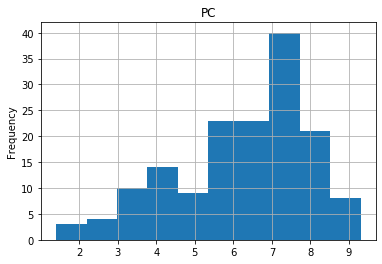

In [110]:
(data.
 query('platform == "PC" & user_score > 0 & year_of_release > 2012')['user_score'].
 plot(kind='hist',
      title='PC',
      grid=True)
)

На первый взгляд, среднее не должно сильно различаться.

Теперь проверим гипотезу, для этого:
- В качестве нулевой гипотезы примем, что средние оценки одинаковы. 
- В качестве критического уровня статистической значимости примем значение 0.05.
- Используем t-критерий Уэлча, в котором дисперсии выборок необязательно равны.

In [111]:
alpha = 0.05
results_1 = st.ttest_ind(data.query('platform == "XOne" & user_score > 0 & year_of_release > 2012')['user_score'], 
                         data.query('platform == "PC" & user_score > 0 & year_of_release > 2012')['user_score'],
                         equal_var=False)

Сравним полученное значение p-value с alpha.

In [112]:
if results_1.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.') 

Не получилось отвергнуть нулевую гипотезу.


**Вывод:**

Средние оценки пользователей для игр платформ Xbox One и PC одинаковые.

### Равенство пользовательских рейтингов жанров Action и Sports

Проверим гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports разные.

Сначала построим гистограммы распределений этих оценок.

**Гистограмма оценок для жанра Action:**

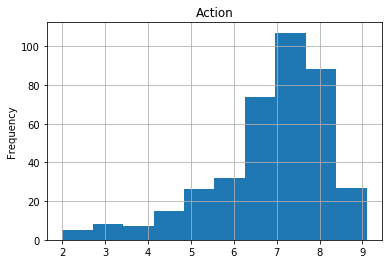

In [114]:
(data.
 query('genre == "Action" & user_score > 0 & year_of_release > 2012')['user_score'].
 plot(kind='hist',
      title='Action',
      grid=True)
)

**Гистограмма оценок для жанра Sports:**

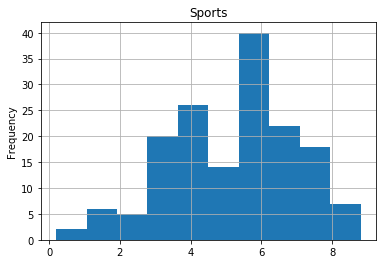

In [115]:
(data.
 query('genre == "Sports" & user_score > 0 & year_of_release > 2012')['user_score'].
 plot(kind='hist',
      title='Sports',
      grid=True)
)

На первый взгляд, среднее должно различаться.

Теперь проверим гипотезу, для этого:
- В качестве нулевой гипотезы примем, что средние оценки одинаковы. 
- В качестве критического уровня статистической значимости примем значение 0.05.
- Используем t-критерий Уэлча, в котором дисперсии выборок необязательно равны.

In [116]:
alpha = 0.05
results_2 = st.ttest_ind(data.query('genre == "Action" & user_score > 0 & year_of_release > 2012')['user_score'], 
                         data.query('genre == "Sports" & user_score > 0 & year_of_release > 2012')['user_score'],
                         equal_var=False)

Сравним полученное значение p-value с alpha.

In [117]:
if results_2.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.') 

Отвергаем нулевую гипотезу.


**Вывод:**

Средние оценки пользователей для игр жанров Action и Sports разные.

## Общий вывод

В данном проекте были проанализированы данные о том, какие закономерности определяют успешность игры.

1. Было проведено первоначальное знакомство со всеми датасетами.


2. Проведена подготовка данных:
    - Названия столбцов приведены к нижнему регистру.
    - Сменен тип данных в некоторых столбцах для того, чтобы в дальнейшем облегчить работу с ними.
    - Обработаны пропуски в данных.
    
    
3. Проведен анализ данных:
    - Показано общее количество выпускаемых игр с 1980 до 2017 года.
    - Приведены гистограммы продаж по самым популярным платформам. Был сделан вывод о том, что в среднем платформы живут 7-8 лет.
    - Был определен актуальный период, за который взята дата начала продаж платформ нового поколения PS4 и Xbox One.
    - Проанализированы продажи по самым популярным платформам в актуальном периоде. Показано, что платформа PS4 вырвалась в лидеры.
    - Исследовано влияние оценок критиков и пользователей на продажи игр на платформах PS4 и Xbox One. Показано, что для обоих платформ продажи сильно коррелируют с оценками критиков, при этом оценки пользователей никак не влияют не продажи.
    - Составлены портреты пользователей из Северной Америки, Европы и Японии. Пользователи из Европы и Северной Америки играют примерно в одинаковые игры (Action, Shooter, Sports) на одинаковых платформах (PS4, Xbox One и PS3 или Xbox 360). Японские же пользователи от них сильно отличаются, играя в игры жанра Role-Platyng и Action на платформах 3DS, PS3 и PS Vita.
    

4. Были проверены следующие гипотезы:
    - "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые". Эта гипотеза была принята как нулевая, и не была отвергнута.
    - "Средние пользовательские рейтинги жанров Action и Sports разные". В качестве нулевой гипотизы в данном случае было принято их равенство. Нулевую гипотезу отвергли, поэтому проверяемая гипотеза верна.